<a href="https://colab.research.google.com/github/ChaeyeonHan/ML_Study/blob/main/Lab01~03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
print(np.__version__)

1.19.5


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# print(tf.__version__)
hello = tf.constant("Hello, TensorFlow!")
sess = tf.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


In [ ]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [ ]:
print("node1: ", node1, "node2: ", node2)
print("node2: ", node3)

node1:  Tensor("Const_2:0", shape=(), dtype=float32) node2:  Tensor("Const_3:0", shape=(), dtype=float32)
node2:  Tensor("Add:0", shape=(), dtype=float32)


In [ ]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1,node2]))
print("sess.run(node3): ",sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [ ]:
# Placeholder
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))  # a=3, b=4.5 더해서 출력하기
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))  #값을 여러개 주기

7.5
[3. 7.]


## Linear Regression 구현
### 1. build graph  2. feed data and run graph  3. update variables in the graph

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# H(x) = Wx + b
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# 여기서 Variable은 tensorflow가 학습하는 과정에서 변경시키는 data
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 우리의 hypothesis XW + b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  # reduce_mean:평균내주는 기능

# GradientDescent -> Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) # 그래프 구현까지 완료

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # Variable 초기화

for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

0 12.056712 [-0.6133708] [0.01404778]
20 0.15674992 [0.61754835] [0.5215166]
40 0.044502575 [0.7455097] [0.5453909]
60 0.039530676 [0.7679427] [0.5243665]
80 0.03589435 [0.77984583] [0.50016195]
100 0.032599755 [0.79028714] [0.47669798]
120 0.029607618 [0.80015194] [0.4542989]
140 0.026890123 [0.80954486] [0.43294895]
160 0.024422035 [0.81849575] [0.41260192]
180 0.022180485 [0.82702583] [0.39321113]
200 0.020144677 [0.8351549] [0.3747316]
220 0.018295715 [0.84290206] [0.3571206]
240 0.016616454 [0.85028505] [0.34033725]
260 0.015091337 [0.857321] [0.3243427]
280 0.013706196 [0.8640265] [0.3090998]
300 0.012448176 [0.87041676] [0.29457325]
320 0.01130564 [0.87650675] [0.28072938]
340 0.010267959 [0.8823104] [0.26753607]
360 0.009325519 [0.88784134] [0.25496286]
380 0.008469587 [0.8931125] [0.24298055]
400 0.00769222 [0.89813566] [0.23156136]
420 0.0069861985 [0.90292305] [0.22067884]
440 0.006344979 [0.9074852] [0.21030773]
460 0.0057626055 [0.9118331] [0.20042405]
480 0.005233688 [0.9

## 동일한 예제 Placeholders를 사용해서
### Placeholder를 사용하면, 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):  # W=1, b=1.1로 예상
  cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], 
                    feed_dict={X:[1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
  if step % 20 == 0:
    print(step, cost_val, W_val, b_val)

0 33.692383 [-0.23619372] [0.7369804]
20 0.0007460189 [0.99934804] [1.0805557]
40 5.1239622e-05 [1.0046055] [1.0832735]
60 4.473654e-05 [1.0043275] [1.0843755]
80 3.906786e-05 [1.0040443] [1.0853988]
100 3.4117882e-05 [1.0037794] [1.0863551]
120 2.979608e-05 [1.0035319] [1.0872487]
140 2.602037e-05 [1.0033005] [1.0880837]
160 2.272388e-05 [1.0030844] [1.0888641]
180 1.9846735e-05 [1.0028825] [1.089593]
200 1.733425e-05 [1.0026939] [1.0902743]
220 1.5136601e-05 [1.0025173] [1.0909114]
240 1.3219096e-05 [1.0023525] [1.0915067]
260 1.1544102e-05 [1.0021985] [1.0920628]
280 1.0081972e-05 [1.0020545] [1.0925827]
300 8.8045535e-06 [1.0019199] [1.0930685]
320 7.689412e-06 [1.0017942] [1.0935224]
340 6.71453e-06 [1.0016767] [1.0939466]
360 5.864031e-06 [1.0015669] [1.094343]
380 5.1215293e-06 [1.0014642] [1.0947133]
400 4.473428e-06 [1.0013685] [1.0950594]
420 3.906081e-06 [1.0012789] [1.0953829]
440 3.411425e-06 [1.0011952] [1.0956852]
460 2.9796333e-06 [1.0011169] [1.0959677]
480 2.602096e-0

In [ ]:
# Testing model
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[6.1000094]
[3.5999937]
[2.5999875 4.6      ]


## Linear Regression의 cost 최소화 구현

Instructions for updating:
non-resource variables are not supported in the long term


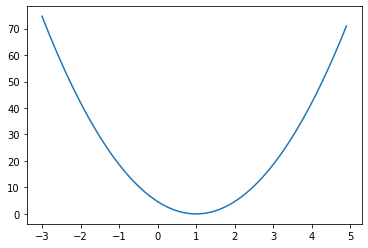

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())  #초기화
W_val = []
cost_val= []
for i in range(-30, 50):
  feed_W = i * 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()


In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data=[1, 2, 3]
y_data=[1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# our hypothesis for linear model X*W
hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize : gradient descent using derivative: W -= learning_rate * deriavative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y)* X)
descent = W - learning_rate*gradient
update = W.assign(descent)

# 위에 minimize 대신해서 사용
# Minimize: gradient descent magic (미분안하고 cost최소로)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)


sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
  sess.run(update, feed_dict= {X: x_data, Y: y_data})
  print(step, sess.run(cost, feed_dict= {X: x_data, Y: y_data}), sess.run(W))
# step, cost, W값 순서로 출력된다
# cost는 점점 작아지고, W는 1에 가까워진다. 

0 2.351231 [0.590189]
1 0.6687945 [0.7814341]
2 0.19023475 [0.88343155]
3 0.054111283 [0.93783015]
4 0.015391602 [0.9668428]
5 0.004378054 [0.98231614]
6 0.0012453274 [0.9905686]
7 0.00035422426 [0.9949699]
8 0.00010076069 [0.99731725]
9 2.8661532e-05 [0.9985692]
10 8.15262e-06 [0.9992369]
11 2.3188638e-06 [0.999593]
12 6.5988814e-07 [0.9997829]
13 1.8749729e-07 [0.99988425]
14 5.3383587e-08 [0.99993825]
15 1.5222117e-08 [0.99996704]
16 4.322164e-09 [0.9999824]
17 1.229342e-09 [0.99999064]
18 3.5095127e-10 [0.999995]
19 1.0168222e-10 [0.9999973]
20 2.8649083e-11 [0.99999857]


In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# tf graph input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)
hypothesis = X * W  # Linear Model
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: *Gradient Descent Magic*
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
 
sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
  print(step, sess.run(W))
  sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
